Data before removing rows:
        Price           Adj Close               Close                High  \
0      Ticker                AMZN                AMZN                AMZN   
1        Date                 NaN                 NaN                 NaN   
2  2015-01-02  15.425999641418457  15.425999641418457  15.737500190734863   
3  2015-01-05   15.10949993133545   15.10949993133545  15.418999671936035   
4  2015-01-06   14.76449966430664   14.76449966430664  15.149999618530273   

                  Low                Open    Volume  
0                AMZN                AMZN      AMZN  
1                 NaN                 NaN       NaN  
2  15.347999572753906  15.628999710083008  55664000  
3  15.042499542236328  15.350500106811523  55484000  
4  14.619000434875488  15.112000465393066  70380000  

Data after removing the first and second row:
        Price           Adj Close               Close                High  \
2  2015-01-02  15.425999641418457  15.425999641418457  15.7375

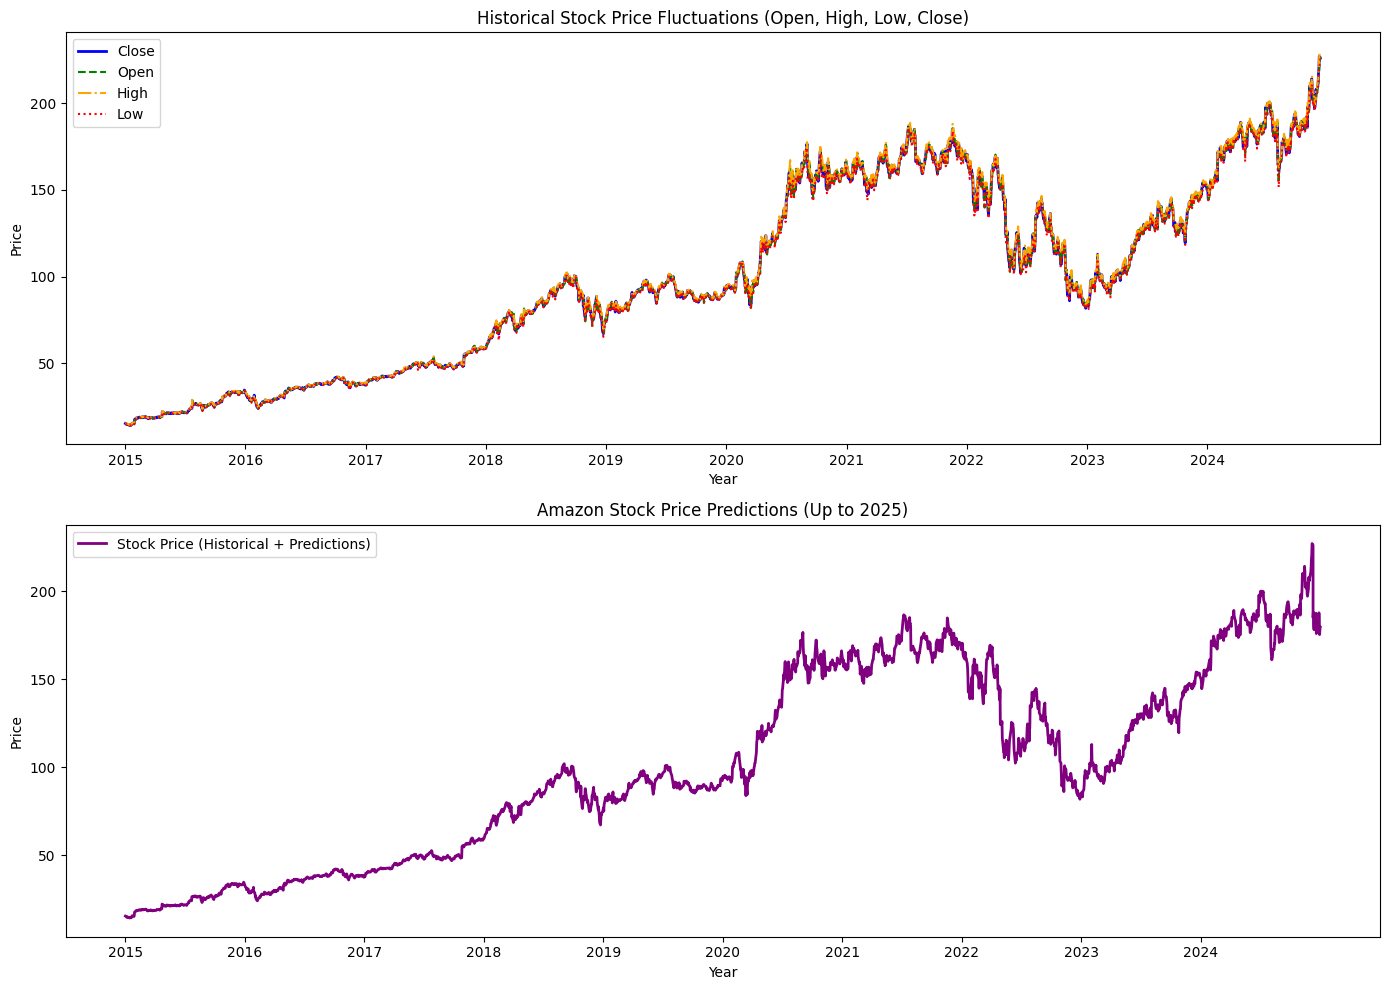

Summary Statistics for Daily Stock Prices:
             close         open         high          low
count  2501.000000  2501.000000  2501.000000  2501.000000
mean    100.484731   100.505960   101.649652    99.262112
std      53.463575    53.484189    54.103002    52.818208
min      14.347500    14.314000    14.539500    14.262500
25%      48.314999    48.450001    48.740501    48.015999
50%      94.315002    94.290001    95.347000    93.207497
75%     153.339996   153.529999   155.076996   151.029999
max     227.029999   227.210007   230.080002   225.669998


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# File path for the stock data
file_path = "Amazon_Stock_Data.csv"

# Read the data from the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the data before processing
print("Data before removing rows:")
print(data.head())

# Remove the first and second row (index 0 and 1)
data = data.drop(index=[0,1])

# Show the data after removing the second row
print("\nData after removing the first and second row:")
print(data.head())

# Convert column names to lowercase for consistency
data.columns = map(str.lower, data.columns)

# Rename the 'price' column to 'date' if applicable
data = data.rename(columns={'price': 'date'})

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Ensure price-related columns are numeric
data['close'] = pd.to_numeric(data['close'], errors='coerce')
data['open'] = pd.to_numeric(data['open'], errors='coerce')
data['high'] = pd.to_numeric(data['high'], errors='coerce')
data['low'] = pd.to_numeric(data['low'], errors='coerce')

# Drop rows with missing values in price-related columns
data = data.dropna(subset=['close', 'open', 'high', 'low'])

# Add a fractional year column (e.g., 2024.5 for mid-year 2024)
data['year_fraction'] = data['date'].dt.year + (data['date'].dt.dayofyear - 1) / 365

# Prepare the data for linear regression
X = data['year_fraction'].values.reshape(-1, 1)
y_close = data['close'].values

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y_close)

# Predict future stock prices up to the end of 2025
last_year_fraction = data['year_fraction'].max()
future_years_fraction = np.arange(last_year_fraction, 2025, 1 / 365)
predictions_close = model.predict(future_years_fraction.reshape(-1, 1))

# Calculate daily price changes from historical data
daily_changes = data['close'].pct_change().dropna()  # Percentage daily change
mean_daily_change = daily_changes.mean()
std_daily_change = daily_changes.std()

# Add realistic daily fluctuations to the predicted prices
random_fluctuation = np.random.normal(loc=mean_daily_change, scale=std_daily_change, size=len(future_years_fraction))
daily_predictions_close = predictions_close * (1 + random_fluctuation)

# Combine historical and predicted data for continuous plotting
combined_years_fraction = np.concatenate([data['year_fraction'], future_years_fraction])
combined_close_prices = np.concatenate([y_close, daily_predictions_close])

# Plot the data
plt.figure(figsize=(14, 10))

# Subplot 1: Historical stock prices (Open, High, Low, Close)
plt.subplot(2, 1, 1)
plt.plot(data['year_fraction'], data['close'], label='Close', color='blue', linewidth=2)
plt.plot(data['year_fraction'], data['open'], label='Open', color='green', linestyle='--', linewidth=1.5)
plt.plot(data['year_fraction'], data['high'], label='High', color='orange', linestyle='-.', linewidth=1.5)
plt.plot(data['year_fraction'], data['low'], label='Low', color='red', linestyle=':', linewidth=1.5)
plt.title('Historical Stock Price Fluctuations (Open, High, Low, Close)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.xticks(ticks=np.arange(2015, 2025, 1), labels=np.arange(2015, 2025, 1))

# Subplot 2: Combined historical and predicted stock prices
plt.subplot(2, 1, 2)
plt.plot(combined_years_fraction, combined_close_prices, label='Stock Price (Historical + Predictions)', color='purple', linewidth=2)
plt.title('Amazon Stock Price Predictions (Up to 2025)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.xticks(ticks=np.arange(2015, 2025, 1), labels=np.arange(2015, 2025, 1))

plt.tight_layout()
plt.show()

# Print a summary of the daily stock price statistics
print("Summary Statistics for Daily Stock Prices:")
print(data[['close', 'open', 'high', 'low']].describe())
